1/1 [==============================] - 0s 92ms/step
Melanoma: 8.31%
Dermatofibroma: 8.25%
Keratosis (Actinic): 46.96%
Keratosis (Benign): 16.31%
Carcinoma: 2.49%
Melanocytic Nevus: 11.23%
Dermatofibroma: 6.46%

Predicted disease: Keratosis (Actinic) (46.96%)


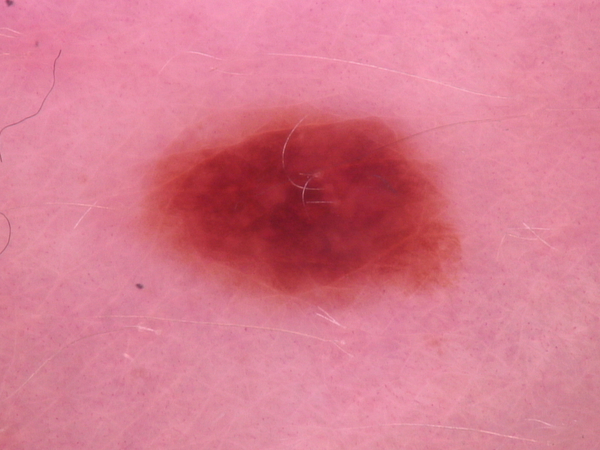

In [10]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image

# load the pre-trained model
model = keras.models.load_model('./model.h5')

# load the image you want to predict
img_path = './skin-disease-detection-final-dataset/dataset-final/skin-disease-dataset/KA_0235.jpg'
img = image.load_img(img_path, target_size=(75, 100))

# display the image inline with its filename

# preprocess the image to match the format expected by the model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.mobilenet_v2.preprocess_input(x)

# make the prediction using the model
preds = model.predict(x)

# extract the predicted output probabilities
pred_probs = preds[0]

# extract the class labels from the model
class_labels = ['Melanoma', 'Dermatofibroma','Keratosis (Actinic)', 'Keratosis (Benign)', 'Carcinoma', 'Melanocytic Nevus', 'Dermatofibroma']

# iterate through the class labels and predicted probabilities
max_prob = 0
max_prob_idx = 0
for i, pred_prob in enumerate(pred_probs):
    class_label = class_labels[i]
    pred_percentage = pred_prob * 100
    if pred_prob > max_prob:
        max_prob = pred_prob
        max_prob_idx = i
    print(f'{class_label}: {pred_percentage:.2f}%')

# highlight the disease class label with the highest prediction percentage
highlighted_class_label = '\033[1m\033[32m' + class_labels[max_prob_idx] + '\033[0m'
print(f"\nPredicted disease: {highlighted_class_label} ({max_prob*100:.2f}%)")
display(Image(filename=img_path, width=200, height=200))
